In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Load Dataset
df = pd.read_csv(r'mcdonalds.csv')

### Data Cleaning and Exploration

In [80]:
df.shape

(1453, 15)

In [81]:
# Review of Data
df.sample(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
185,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,-3,60,Once a year,Female
1252,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+1,50,Every three months,Male
525,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,No,-4,37,Once a year,Female
894,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+3,51,Once a month,Female
1339,No,Yes,No,Yes,No,Yes,No,No,No,No,No,0,48,Once a week,Male


In [82]:
# Summary of McDonald's Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [83]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

There is no Null values.

In [84]:
# Check for incorrect values
df['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [85]:
# Remove unnecessary inputs
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})

In [86]:
# Stats for Age
df['Age'].describe()

count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64

In [87]:
# Count of Unique values 
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [88]:
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

### Gender

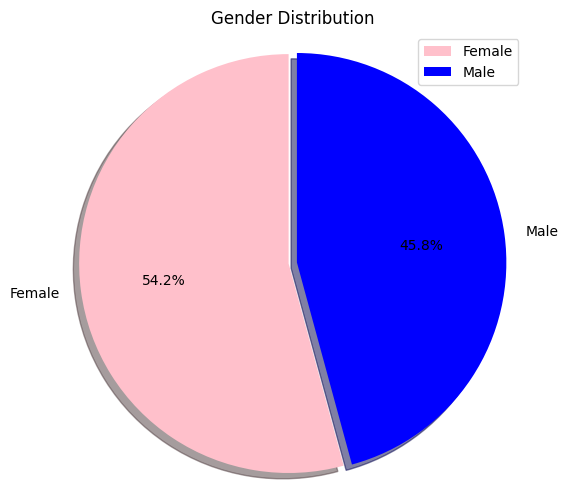

In [89]:
# Distribution of Gender 
gender_counts = df['Gender'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%',startangle = 90,explode = [0, 0.04], colors = ['Pink','Blue'],shadow = True)
plt.title('Gender Distribution')
plt.axis('equal')
plt.legend()
plt.show()

### Age

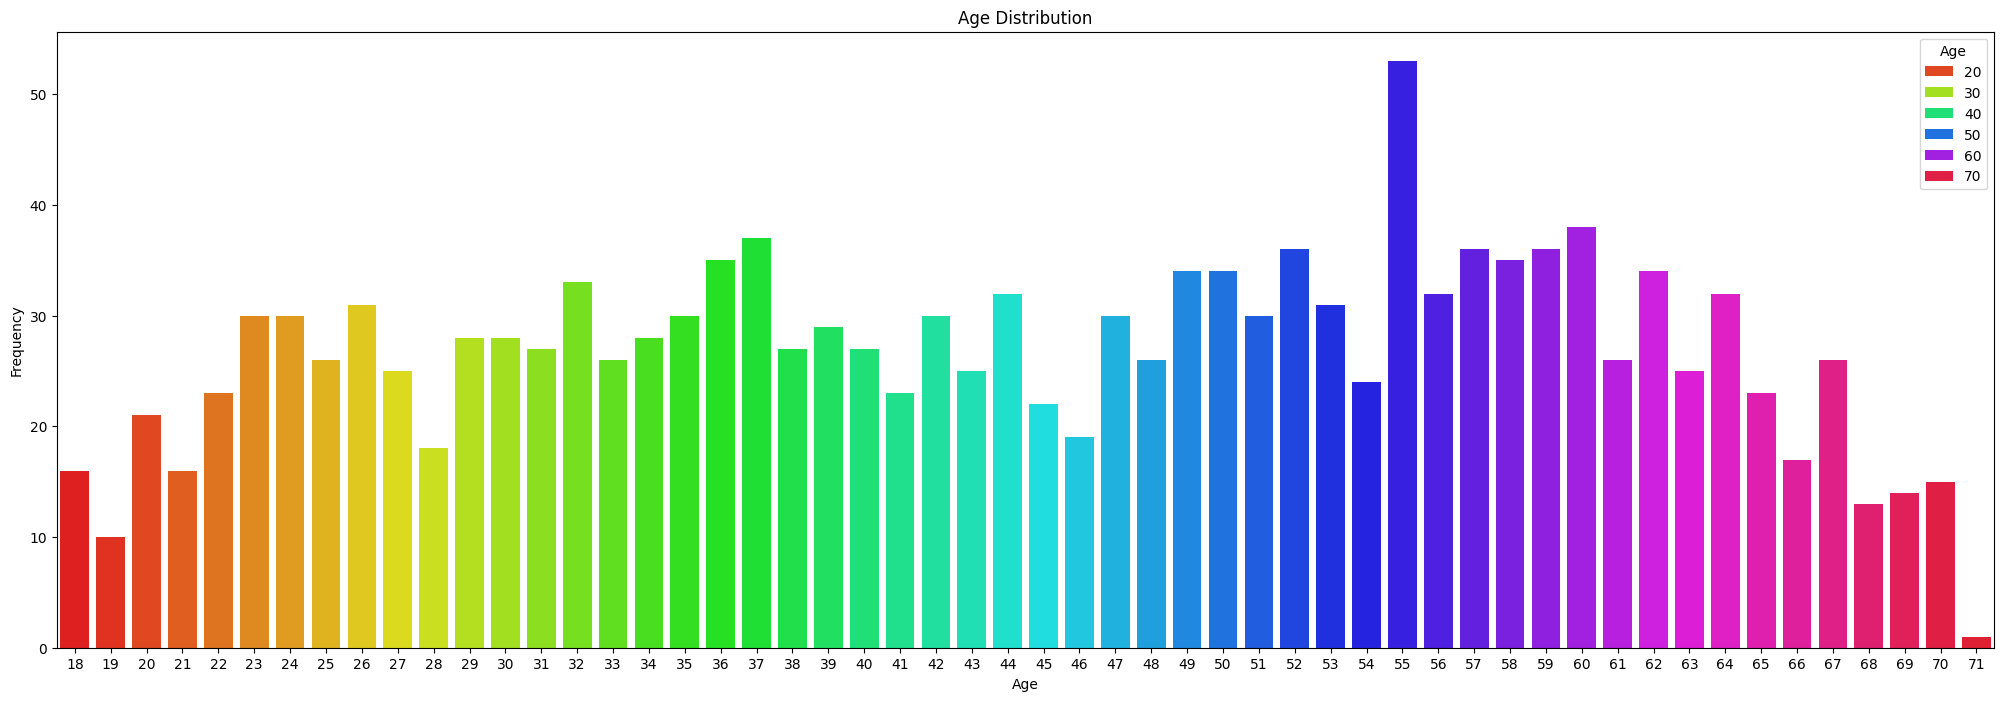

In [90]:
# Distribution of Age

# Plottting Countplot
plt.figure(figsize = (25, 8))
sns.countplot(df, x = 'Age', hue = 'Age', palette = 'hsv')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [163]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [93]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [96]:
cols = df.iloc[:, :11].columns
cols


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [97]:
# Convert Categorical values to Numerical values
def cat_conversion(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat_cols = df.iloc[:, :11]

for i in cat_cols.columns:
    cat_conversion(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


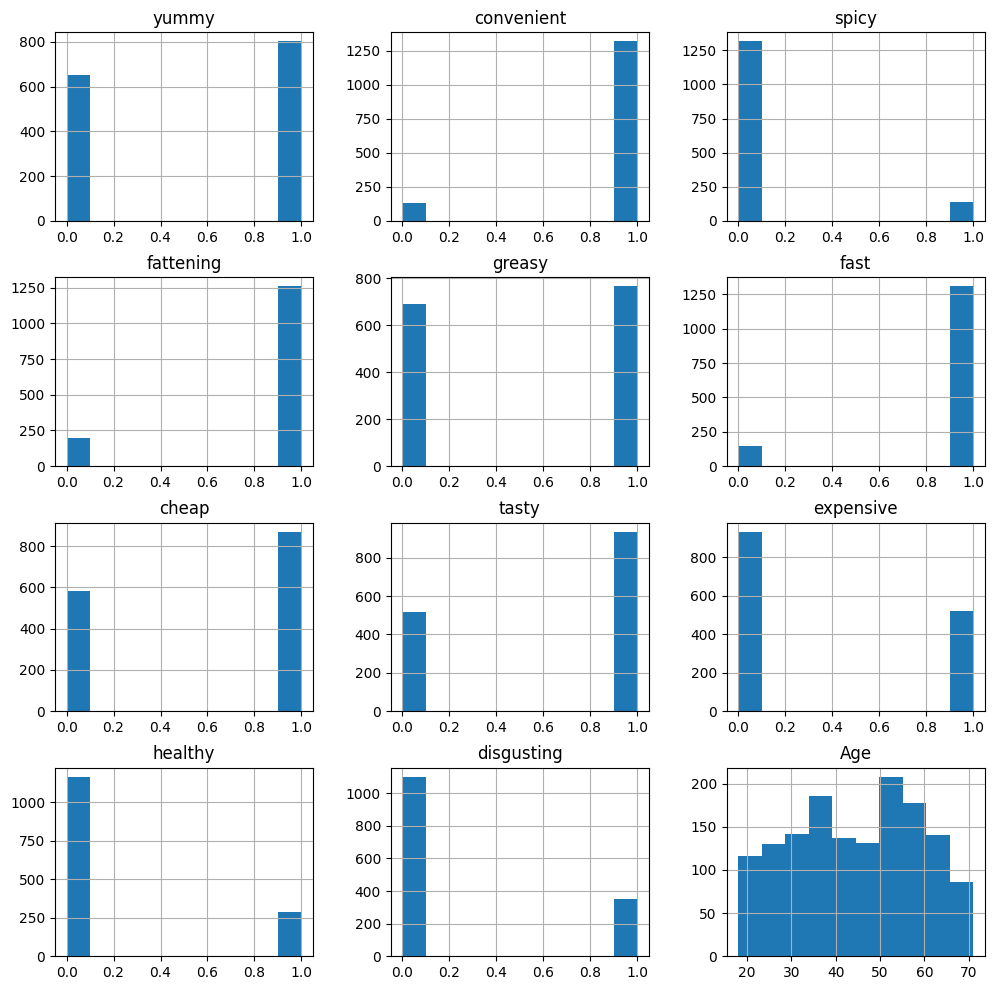

In [106]:
# Plotting Histogram of each numerical colmuns
plt.rcParams['figure.figsize'] = (12, 12)
df.hist()
plt.show()

In [110]:
col_val = df.iloc[:, :11].values
col_val

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

### Prinicpal Component Analysis

In [161]:
# PCA
scaler = preprocessing.scale(col_val)

pca = PCA(n_components=11)
scaled_data = pca.fit_transform(col_val)
cols = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']

pca_df = pd.DataFrame(scaled_data, columns = cols)
pca_df



,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.425367,0.219079,-0.663255,-0.401300,-0.201705,0.389767,-0.211982,-0.163235,-0.181007,-0.515706,0.567074
1,0.218638,-0.388190,0.730827,-0.094724,-0.044669,0.086596,-0.095877,0.034756,-0.111476,-0.493313,0.500440
2,-0.375415,-0.730435,0.122040,0.692262,-0.839643,0.687406,0.583112,-0.364379,0.322288,-0.061759,-0.242741
3,0.172926,0.352752,0.843795,0.206998,0.681415,0.036133,-0.054284,0.231477,0.028003,0.250678,0.051034
4,-0.187057,0.807610,-0.028537,0.548332,-0.854074,0.097305,-0.457043,-0.171758,0.074409,-0.031897,-0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.550242,-0.275031,0.013737,0.200604,0.145063,-0.306575,-0.075308,-0.345552,0.136589,0.432798,0.456076
1449,0.957339,-0.014308,-0.303843,0.444350,0.133690,-0.381804,-0.326432,-0.878047,0.304441,0.247443,0.193671
1450,0.185894,-1.062662,-0.220857,-0.467643,0.187757,0.192703,-0.091597,0.036576,-0.038255,-0.056518,0.012800
1451,1.182064,0.038570,-0.561561,0.701126,-0.047645,-0.193687,-0.027335,0.339374,-0.022267,0.002573,0.105316


### Elbow Method

In [166]:
# WCSS for a range of cluster
wcss = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i,)
    Kmeans.fit(pca_df.values)
    wcss.append(Kmeans.inertia_)

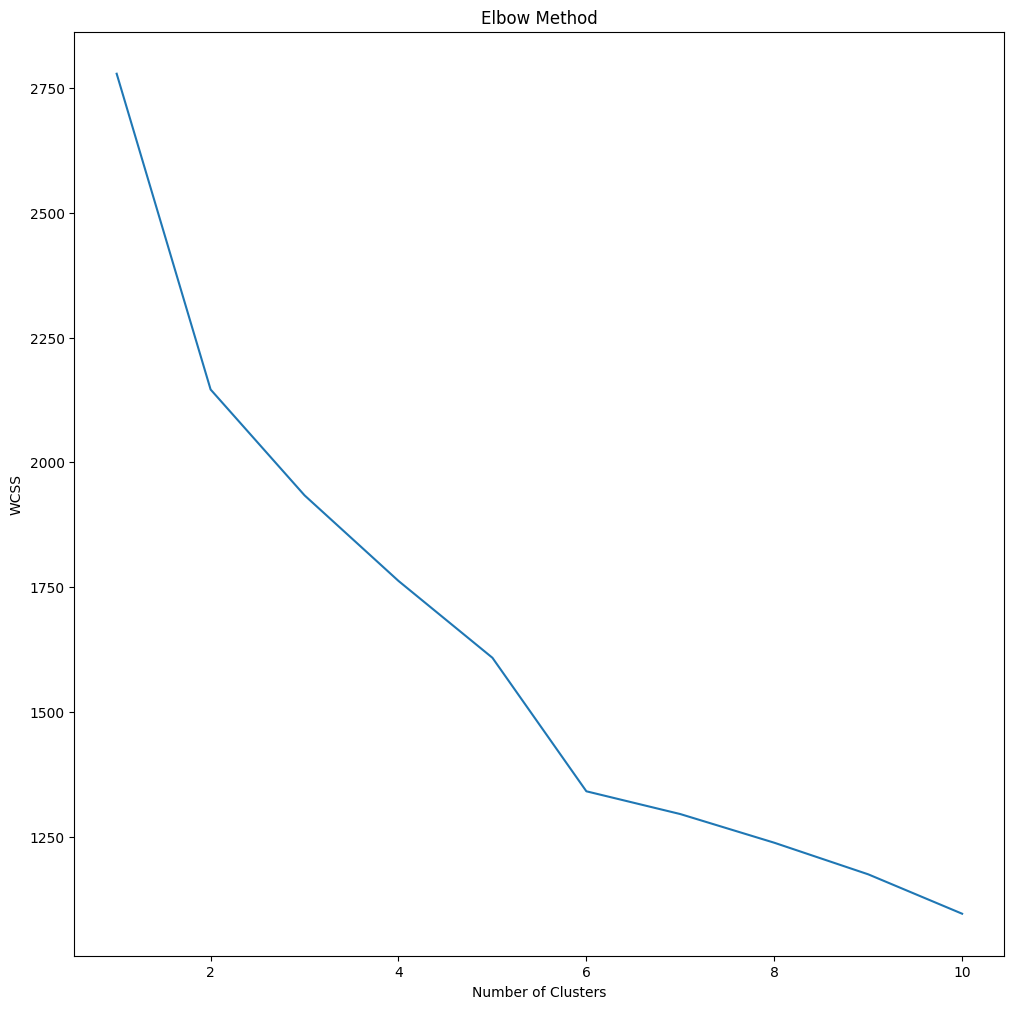

In [167]:
# Plotting Elbow Method
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### K-means Clustering

Perform K-means clustering using 4 clusters (as determined by the elbow method)

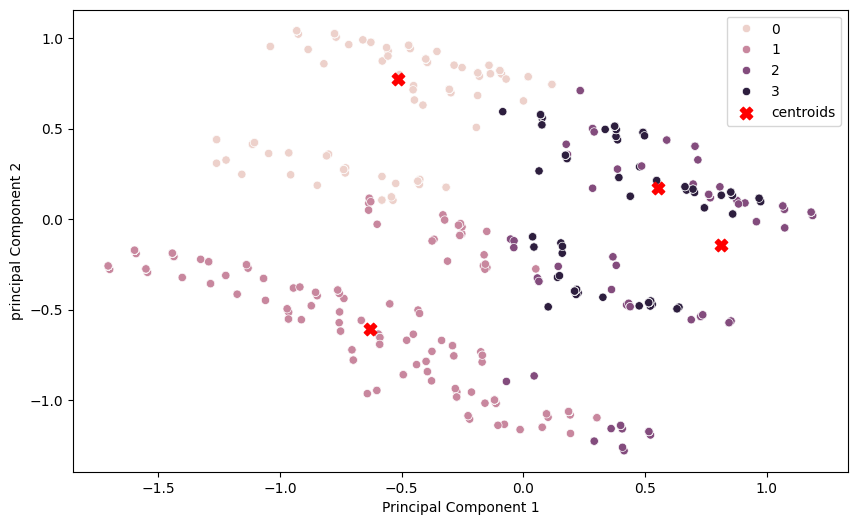

In [180]:
kmeans = KMeans(n_clusters=4 , init = 'k-means++', random_state=0).fit(pca_df)

df['cluster_num'] = kmeans.labels_

# Plotting clusters
plt.figure(figsize = (10, 6))
sns.scatterplot(pca_df, x = 'pc1', y = 'pc2', hue = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('principal Component 2')
plt.legend()
plt.show()

### Step 8: Selecting the Target Segments

In [207]:
# Mean of VisitFrequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit

cluster_num
0    2.800000
1    2.566740
2    2.523207
3    2.660793
Name: VisitFrequency, dtype: float64

In [198]:
like_map = {'I HATE IT!-5': -5,'-5':-5, '-4': -4, '-3': -3, '-2': -2, '-1': -1, '0': 0, '+1': 1, '+2': 2, '+3': 3, '+4': 4, '+5': 5, 'I LOVE IT!+5': 5}
df['Like.n'] = df['Like'].map(like_map)

In [201]:
like = df.groupby('cluster_num')['Like.n'].mean()
like

cluster_num
0   -1.921311
1   -0.122538
2    3.126582
3    2.268722
Name: Like.n, dtype: float64

In [204]:
print(len(visit), len(like))

4 4


In [202]:
gender = (df['Gender'] == 'Female').astype(int)
gender_mean = gender.groupby(df['cluster_num']).mean()
gender_mean

cluster_num
0    0.577049
1    0.452954
2    0.607595
3    0.574890
Name: Gender, dtype: float64

In [205]:
visit = visit.reset_index(drop=True)
like = like.reset_index(drop=True)
gender_mean = gender_mean.reset_index(drop=True)

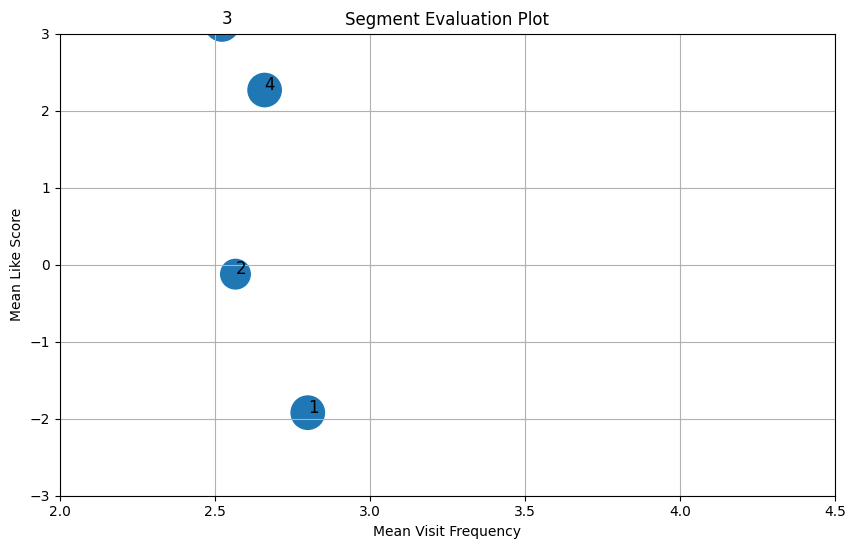

In [213]:
# Plotting Simple Segment Evaluation
plt.figure(figsize = (10,6))
plt.scatter(visit, like, s = 10 * gender_mean * 100, alpha=1)
plt.xlim(2,4.5)
plt.ylim(-3, 3)

for i in range(len(visit)):
    plt.text(visit.iloc[i], like.iloc[i], str(i + 1), fontsize = 12)

plt.title('Segment Evaluation Plot')
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like Score')
plt.grid()
plt.show()